***
<center> <img src="https://res.cloudinary.com/webuvg/image/upload/f_auto,q_auto,w_165,c_scale,fl_lossy,dpr_2.63/v1548082900/WEB/Nosotros/Imagen%20Institucional/Logotipo%20UVG/Logotipo%20UVG/logotipo-uvg_thumb2x.jpg"> <left/> <br>

# <center> **Proyecto # 2**  <br> *Modelos de Regresión* 
## <center> **Integrantes:** <br> Juan Carlos Jiménez - 13068 <br> Andres Tejeda - 201564 <br> Diego Rodriguez - 13111 <br>

***   


# Objetivo:

<p style='text-align: justify;'> En el presente proyecto buscará realizar un modelo de regresión lineal múltiple para predecir una variable dentro de un set de datos, que resuelva una pregunta de investigación. Siendo además su ojetivo principal reforzar los conceptos adquiridos en el segundo modulo del curso Manegerial Statistics de la maestria Bussines in Data Analytics, utilizando la plataforma de Jupyter Lab, el lenguaje de programacion Python y sus distintas librerias. </p>

<br>    

***

# <center> **Importación de Datos**


***

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np

from statsmodels.sandbox.predict_functional import predict_functional as pf

In [81]:
# Cargamos la información 
da = pd.read_csv("Bodyfat.csv")
da.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [82]:
# Generación de rangos para la variables
da["Agegrp"] = pd.cut(da.Age, [21, 31, 41, 51, 61, 71, 81])
da["Weightgrp"] = pd.cut(da.Weight, [100, 150, 200, 250, 400]) 
da["Heightgrp"] = pd.cut(da.Height, [60, 65, 70, 75, 80]) 
da["bodyfatgrp"] = pd.cut(da.bodyfat, [10, 13, 21, 25, 32, 100]) 

***
# Introducción:

<p style='text-align: justify;'> En la comunidad científica y médica existen diferentes formas de poder determinar si el estado actual de una persona es saludable. Existen exámenes que determinan el porcentaje de grasa corporal de una persona a través del uso de la tecnología, no obstante, estos son de alto costo. Debido a esto, se ha desarrollado diversos estudios para verificar si es posible calcular de manera precisa el porcentaje de grasa corporal de una persona haciendo uso de sus mediciones biométricas. Sin embargo, en algunos casos podría complicarse debido a que dichas medidas deben realizarse a cabo en lugares especificos de la anatomía humana. A partir de ello surge la interrogante si es posible obtener una aproximación suficientemente cercana al valor real del porcentaje de grasa en el curpo, a partir de mediciones básicas tales como; la altura, peso y edad del individuo. </P>


<br>


+ ###  Pregunta de investigacion:

    ¿Es posible determinar con precisión si una persona padece de obesidad únicamente con los predictores de peso, altura y edad?

    **Nota:** Se abordará la pregunta de investigación utilizando el siguiente [set de datos](http://staff.pubhealth.ku.dk/~tag/Teaching/share/data/Bodyfat.html)
    
<br>

***


# <center> **Análisis Exploratorio de Datos**


***

## Distribución de la población a partir de su edad:
***

In [83]:
da['Age'].describe()

count    251.000000
mean      44.888446
std       12.627094
min       22.000000
25%       35.500000
50%       43.000000
75%       54.000000
max       81.000000
Name: Age, dtype: float64

In [84]:
mediana_edad = float(da['Age'].dropna().median())
print("La Mediana es " + str(mediana_edad) + " años")

La Mediana es 43.0 años


In [85]:
moda_edad = float(da['Age'].dropna().mode())
print("La Moda es " + str(moda_edad) + " años" )

La Moda es 40.0 años


Text(0.5, 1.0, 'Histograma Distribución de Edad')

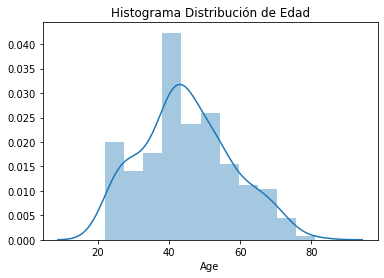

In [86]:
sns.distplot(da.Age.dropna()).set_title("Histograma Distribución de Edad")

#### Inferencia:
<p style='text-align: justify;'> A partir de los graficos generados anteriormente, se puede inferir que la distribución de edades de la población tiene un comportamiento aproximadamente normal, con un leve sesgo hacia la derecha. Siendo la población muestral en su totalidad es de 251 sujetos, distribuidos entre edades de 22 a 81 años. </p>

<br>

## Distribución de la población a partir de su altura:
***

In [87]:
da['Height'].describe()

count    251.000000
mean      70.310757
std        2.614296
min       64.000000
25%       68.250000
50%       70.000000
75%       72.250000
max       77.750000
Name: Height, dtype: float64

In [88]:
mediana_altura = float(da['Height'].dropna().median())
print("La Mediana es " + str(mediana_altura) + " Pulgadas")

La Mediana es 70.0 Pulgadas


In [89]:
moda_altura = float(da['Height'].dropna().mode())
print("La Moda es " + str(moda_altura) + " Pulgadas" )

La Moda es 71.5 Pulgadas


Text(0.5, 1.0, 'Histograma Distribución de Altura')

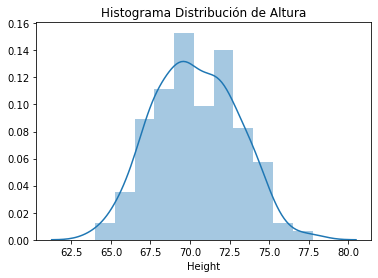

In [90]:
sns.distplot(da.Height.dropna()).set_title("Histograma Distribución de Altura")

#### Inferencia:
<p style='text-align: justify;'> A partir de los graficos generados anteriormente, se puede inferir que la distribución de alturas de la población tiene un comportamiento aproximadamente normal, con un leve sesgo hacia la izquierda. Los 251 sujetos de la población muestral estan contenidos en un rango de altura entre 64 y 77.8 pulgadas. </p>

<br>

## Distribución de la población a partir de su peso:
***

In [91]:
da['Weight'].describe()

count    251.000000
mean     178.820518
std       29.401480
min      118.500000
25%      158.750000
50%      176.250000
75%      196.875000
max      363.150000
Name: Weight, dtype: float64

In [92]:
mediana_peso = float(da['Weight'].dropna().median())
print("La Mediana es " + str(mediana_peso) + " Libras")

La Mediana es 176.25 Libras


In [93]:
moda_peso = da['Weight'].dropna().mode()
print("La Moda es " + str(moda_peso [4]) + " Libras" )

La Moda es 170.75 Libras


Text(0.5, 1.0, 'Histograma Distribución de Peso')

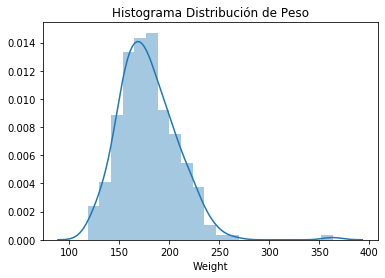

In [94]:
sns.distplot(da.Weight.dropna()).set_title("Histograma Distribución de Peso")

#### Inferencia:
<p style='text-align: justify;'> A partir de los graficos generados anteriormente, se puede inferir que la distribución del peso de la población tiene un comportamiento aproximadamente normal, con un leve sesgo hacia la derecha. Los 251 sujetos de la población muestral estan contenidos en un rango de peso entre 118.5 y 363.2 libras.  </p>

<br>

## Visualización relacional entre variables dependientes e independientes:
***

<br>

<p style='text-align: justify;'> Se escogió utilizar los rangos de edad como pivote para simplificar la visualización y así poder validar que exista la misma tendencia en cualquier rango de edad, buscando comprobar a su vez si existe una relación directa entre la grasa corporal y el aumento de la edad. </p>

Text(0.5, 1.0, 'Boxplot - Porcentaje Grasa Corporal vs Rango de Edad')

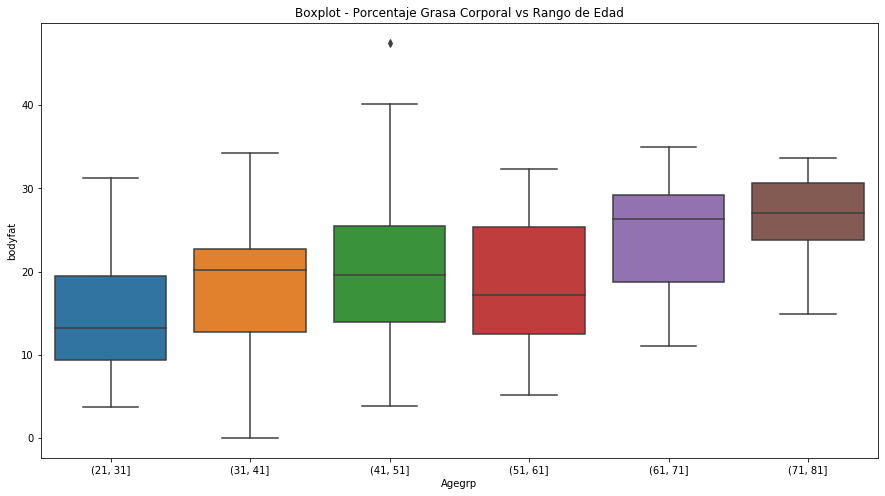

In [95]:
plt.figure(figsize=(15, 8)) 
sns.boxplot(x="Agegrp", y="bodyfat", data=da).set_title("Boxplot - Porcentaje Grasa Corporal vs Rango de Edad")


#### Inferencia:

<p style='text-align: justify;'> A partir del grafico anterior podemos inferir que existe una tendencia de relación positiva entre el porcentaje de grasa comporal (PGC) y la edad del individuo. Lo que nos indica que a medida que avanza la edad de un individuo la tendencia a tener un porcentaje de grasa corporal aumenta. En este sentido existen varios factores que pueden impactar a esta situación, como la perdida de masa muscular en edades avanzadas ya que disminuye en gran porcentaje la actividad fisica que realiza el individuo. Además podemos observar que no importando el rango de edad la dispersión de PGC se mantiene en proporción. </p>

<br>

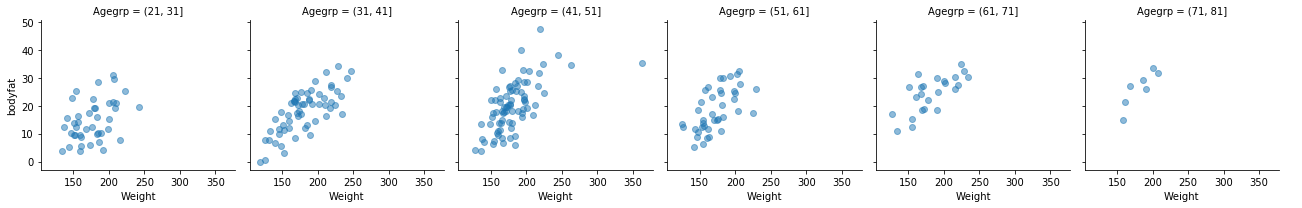

In [96]:
_ = sns.FacetGrid(da, col="Agegrp").map(plt.scatter, "Weight", "bodyfat", alpha=0.5).add_legend()

#### Inferencia:

<p style='text-align: justify;'> A simple vista se observa que existe una tendencia de relación positiva con pendiente marcada en relación al porcentaje de grasa comporal y el peso del individuo, distribuido por rangos de edad. Es obvio que entre un individuo posea más peso, su porcentaje de grasa corporal sea alto a tal grado de la obesidad. Sin embargo debemos tomar en consideración que no se aplica siempre, especificamente en casos en los cuales la persona tiene una actividad fisica activa y con ella gana gran cantidad de masa corporal lo que implica un incremento de su peso. </p>

<br>

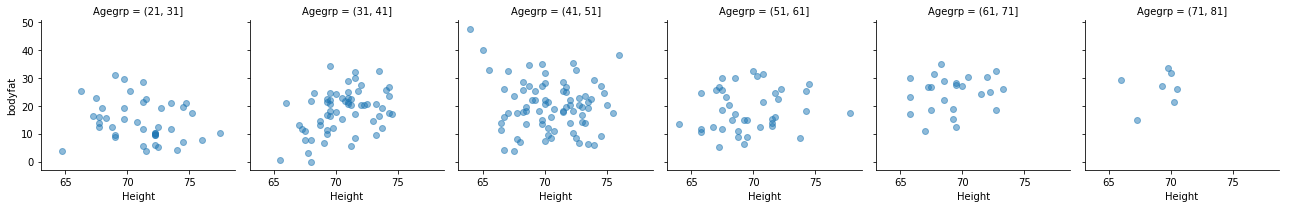

In [97]:
_ = sns.FacetGrid(da, col="Agegrp").map(plt.scatter, "Height", "bodyfat", alpha=0.5).add_legend()

#### Inferencia:

<p style='text-align: justify;'>  A diferencia de la distribución anterior no se identifica un relación directa entre la altura y el porcenjate de grasa corporal en un individuo. Lo que parece acertado puesto que no importando la estatura del individuo, existe la posibilidad que padezca de obesidad o se encuentre en su peso ideal es la misma, no excluyendo cualquier otro estado fisico. </p>

<br>


## Distribución marginal del porcentaje de grasa corporal:
***

Text(0.5, 1.0, 'Histograma Distribución del PSG')

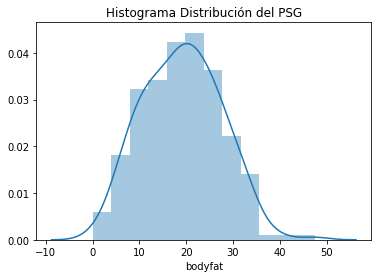

In [98]:
sns.distplot(da.bodyfat.dropna()).set_title("Histograma Distribución del PSG")

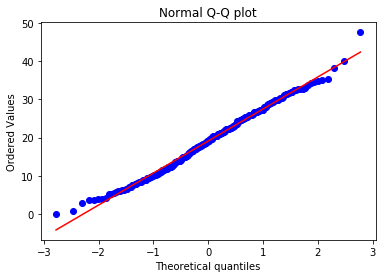

In [99]:
stats.probplot(da['bodyfat'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

#### Inferencia:

<p style='text-align: justify;'>  A partir del histograma anterior podemos observar que la distribucion para el porcentaje de grasa corporal es aproximadamente normal, y además lo podemos comprobar a partir de la Q-Q Plot puesto que los datos se ajustan muy bien a la regresion lineal aplicada.
    
<br>


*** 
# <center> **Modelado de Predicción**


***

<br>

#### Descripción:

<p style='text-align: justify;'> Para responder parte la pregunta de investigación es necesario desarrollar el modelo para poder predecir el porcentaje de grasa corporal (variable dependiente), esto será posible a través de las siguientes variables independientes: </p>

   - Edad
   - Altura
   - Peso

<p style='text-align: justify;'> Estas variables fueron seleccionadas debido a que son las medidas o datos personales que una persona común puede obtener con mayor facilidad. No requieren de identificar puntos específicos de la anatomía humana para poder llevar a cabo una medición biométrica. Este mismo criterio fue utilizado para el razonamiento de exclusión de las demás variables del set de datos. El primer paso será realizar un modelo para cada variable independiente para verificar la relación entre cada una el porcentaje de grasa corporal. Por referencia, se obtendrá el valor de la desviación estándar del porcentaje de grasa corporal de la población muestral. </p>

In [100]:
std_dev = da['bodyfat'].std()
print("La desviación estandar para el PGC es " + str(std_dev))

La desviación estandar para el PGC es 8.340070986732968


<br>

## Modelo de regresión lineal respecto a la Edad:
***

In [101]:
model = sm.OLS.from_formula("bodyfat ~ Age", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     23.47
Date:                Sun, 17 May 2020   Prob (F-statistic):           2.23e-06
Time:                        23:00:09   Log-Likelihood:                -876.74
No. Observations:                 251   AIC:                             1757.
Df Residuals:                     249   BIC:                             1765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3939      1.866      5.571      0.000       6.720      14.068
Age            0.1939      0.040      4.845      0.000       0.115       0.273
==============================================================================
Omnibus:                        1.496   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.586
Skew:                           0.158   Prob(JB):                        0.452
Kurtosis:                       2.773   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>

#### Inferencia:

<p style='text-align: justify;'> Este modelo ajustado implica que cuando comparamos dos personas con un año de diferencia, el sujeto con un año más de vida tendrá, en promedio, 0.19 unidades más de porcentaje de grasa corporal. Tomando en cuenta que el grupo de personas está dentro de las edades de 22 a 81 años. Esto significaría que el sujeto con menor edad tendrá una diferencia de 11.21 unidades con el sujeto de mayor edad en el grupo únicamente por su diferencia de años. Este cambio es significativo debido a que es mayor a la desviación estándar de la muestra estudiada. También se evalúa la correlación entre las dos variables y su R-cuadrado es del 0.086. Esto significa que solo el 8.6% de la variabilidad del porcentaje de grasa corporal es explicada por la edad. </p>

<br>

## Modelo de regresión lineal respecto al Peso:
***

In [102]:
model = sm.OLS.from_formula("bodyfat ~ Weight", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     148.2
Date:                Sun, 17 May 2020   Prob (F-statistic):           4.60e-27
Time:                        23:00:10   Log-Likelihood:                -829.43
No. Observations:                 251   AIC:                             1663.
Df Residuals:                     249   BIC:                             1670.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.8889      2.579     -4.610      0.000     -16.969      -6.809
Weight         0.1733      0.014     12.174      0.000       0.145       0.201
==============================================================================
Omnibus:                        0.065   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.109
Skew:                           0.038   Prob(JB):                        0.947
Kurtosis:                       2.933   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

#### Inferencia:

<p style='text-align: justify;'> Este modelo ajustado implica que cuando comparamos dos personas con una libra de diferencia, el sujeto con una libra más de peso tendrá, en promedio, 0.17 unidades más de porcentaje de grasa corporal. Tomando en cuenta que el grupo de personas está dentro de los pesos de 118 y 363 libras. Esto significaría que el sujeto con menor peso tendrá una diferencia de 41.65 unidades con el sujeto de mayor peso en el grupo únicamente por su diferencia de peso. Esto se interpreta como un cambio muy significativo al ser múltiples veces la desviación estándar de la muestra. También se evalúa la correlación entre las dos variables y su R-cuadrado es del 0.373. Esto significa que el 37.3% de la variabilidad del porcentaje de grasa corporal es explicada por el peso. </p>

<br>

## Modelo de regresión lineal respecto a la Altura:
***

In [103]:
model = sm.OLS.from_formula("bodyfat ~ Height", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1362
Date:                Sun, 17 May 2020   Prob (F-statistic):              0.712
Time:                        23:00:10   Log-Likelihood:                -887.97
No. Observations:                 251   AIC:                             1780.
Df Residuals:                     249   BIC:                             1787.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3412     14.221      1.712      0.088      -3.667      52.349
Height        -0.0746      0.202     -0.369      0.712      -0.473       0.323
==============================================================================
Omnibus:                        2.244   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                2.059
Skew:                           0.134   Prob(JB):                        0.357
Kurtosis:                       2.646   Cond. No.                     1.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

#### Inferencia:

<p style='text-align: justify;'> Por último, este modelo ajustado implica que cuando comparamos dos personas con una pulgada de diferencia, el sujeto con una pulgada más de altura tendrá, en promedio, 0.07 unidades menos de porcentaje de grasa corporal. Tomando en cuenta que el grupo de personas está dentro de los pesos de 64 y 77 libras. Esto significaría que el sujeto con mayor altura tendrá una diferencia de 0.91 unidades con el sujeto de menor altura en el grupo únicamente por su diferencia de altura. Esto se interpreta como un cambio no significativo en comparación con la desviación estándar de la muestra del porcentaje de grasa corporal. También se evalúa la correlación entre las dos variables y su R-cuadrado es del 0.001. Esto significa que el 0.1% de la variabilidad del porcentaje de grasa corporal es explicada por la altura. </p>


<br>

## Modelo de regresión respecto al Peso, Altura y Edad:
***

In [104]:
model = sm.OLS.from_formula("bodyfat ~ Age + Weight + Height", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sun, 17 May 2020   Prob (F-statistic):           6.80e-43
Time:                        23:00:11   Log-Likelihood:                -787.10
No. Observations:                 251   AIC:                             1582.
Df Residuals:                     247   BIC:                             1596.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.4151     10.792      4.857      0.000      31.159      73.671
Age            0.1428      0.029      4.886      0.000       0.085       0.200
Weight         0.2233      0.014     16.004      0.000       0.196       0.251
Height        -1.1329      0.162     -7.000      0.000      -1.452      -0.814
==============================================================================
Omnibus:                        2.310   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.971
Skew:                          -0.169   Prob(JB):                        0.373
Kurtosis:                       3.272   Cond. No.                     6.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

#### Inferencia:

<p style='text-align: justify;'> Para este modelo ajustado multivariable, se pueden implicar lo siguiente de cada uno de los coeficientes: </p>

 - **Coeficiente 1:** Por cada año de edad más que tenga un sujeto con respecto a otro, se tendrá, en promedio, 0.14 unidades más de porcentaje de grasa.
 - **Coeficiente 2:** Por cada libra de más que tenga un sujeto con respecto a otro, se tendrá, en promedio, 0.22 unidades más de porcentaje de grasa.
 - **Coeficiente 3:** Por cada pulgada de más que tenga un sujeto con respecto a otro, se tendrá, en promedio, 1.13 unidades menos de porcentaje de grasa.

<p style='text-align: justify;'> Agregando a esto, la correlación entre el conjunto de las variables independientes y el porcentaje de grasa corporal es de 0.553. Lo que quiere decir que el 55.3% de la variabilidad del porcentaje de grasa está dado por el peso, altura y edad. </p>

El modelo terminaria teniendo la siguiente forma:

\begin{align}
y = 52.41 + 0.14(edad) + 0.22 (peso) - 1.13(altura)
\end{align}

<br>


<br>

## Grafico de Modelo:
***


C:\Users\Juanca\anaconda3\lib\site-packages\statsmodels\sandbox\predict_functional.py:171: ValueWarning: 'Wrist', 'Neck', 'Ankle', 'Forearm', 'Knee', 'Heightgrp', 'Density', 'Biceps', 'Weightgrp', 'Abdomen', 'Agegrp', 'Thigh', 'Chest', 'bodyfatgrp', 'Hip' in data frame but not in summaries or values.
  ValueWarning)


Text(0, 0.5, 'Bodyfat percentage')

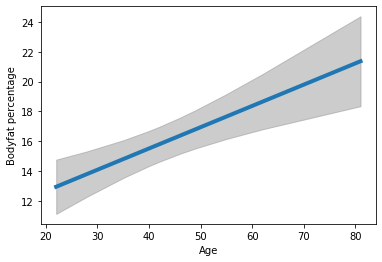

In [106]:
values = {"Weight": 176, "Height": 72.3}

pr, cb, fv = pf(result, "Age",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
ax.set_ylabel("Bodyfat percentage")


*** 
# <center> **Predicción**


***

<br>

Para realizar la predicción se utilizara datos reales de *Andres Tejeda*  tomados de en consulta nutricional:

 - **Altura =** 70.07 pulgadas.
 - **Peso =** 167.33 lbs.
 - **Edad =** 25 años.
 
El porcentaje de grasa corporal calculado por la nutricionista en dicha consulta fue de 11.7 %, calculado a partir de otras variables como el diametro de la cintura y el abdomen. El valor resultante de la predicción para una persona de 25 años sera un valor en el intervalo 11.8 a 14.5, hacienco uso de la gráfica modelada anteriormente.   



In [114]:
y = 52.41 + (0.14 * (25)) + (0.22 * (167.33)) - (1.13 * (70.07))
print("El valor PGC calculado es de " + str(y))

El valor PGC calculado es de 13.543500000000009


In [120]:
Porcentaje_error =  ((- 11.7 + 13.54)/11.7) * 100
print("El % de error es de " + str(Porcentaje_error) + ' %')

El % de error es de 15.726495726495726 %


***
# **Conclusiones**:

 + Por si solas, las variables independientes no tienen la correlación suficiente con el porcentaje de grasa corporal, por lo que sus predicciones no son tan precisas.
 + Se observa que el peso y la edad si tienen relaciones positivas con respecto al porcentaje de grasa corporal de una persona.
 + El resultado de la predicción estuvo 1.84 unidades por arriba del valor real del porcentaje de grasa corporal del sujeto, esto significa que tiene un porcentaje de error de **15.72%**
 + Respondiendo la pregunta de investigación; se puede comprobar que es un modelo base robusto capaz de realizar una estimación aproximada de la real, se buscaría mejorar su precisin incorporando variables como los diametros de cintura y abdomen.

***
***